In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../sukkiri-ml-codes/datafiles/Survived.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
# 生存者と死亡者のカウント
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
# 欠損値の確認
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# データ数の確認
df.shape

(891, 11)

In [9]:
# Age列を平均値で穴埋め
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Embark列を最頻値で穴埋め
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# 特徴量として利用する列を指定
col = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

x = df[col]
t = df['Survived']

In [12]:
# 訓練データとテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0)

# x_trainのサイズ
x_train.shape

(712, 5)

In [13]:
# モデルの作成
model = tree.DecisionTreeClassifier(max_depth=3, random_state=0, class_weight = "balanced")

# 学習
model.fit(x_train, t_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [15]:
# モデルの正解率を確認
model.score(X = x_test, y = t_test)

0.7374301675977654

In [16]:
# learn関数の定義
def learn(x, t, depth = 3):
    # 訓練データとテストデータに分割
    x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0)
    
    # モデルの作成
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight = "balanced")
    
    # 学習
    model.fit(x_train, t_train)
    
    # モデルの正解率を確認
    score = model.score(X = x_train, y = t_train)
    score2 = model.score(X = x_test, y = t_test)
    
    # 結果返却
    return round(score, 3), round(score2, 3), model

In [17]:
# 木の深さを増やして正解率を計算する
# 深さjは1から14まで
for j in range(1, 15):
    train_score, test_score, model = learn(x, t, depth = j)
    print("深さ{}：訓練データの正解率{:.3f}、テストデータの正解率{:.3f}".format(j, train_score, test_score))

深さ1：訓練データの正解率0.659、テストデータの正解率0.704
深さ2：訓練データの正解率0.699、テストデータの正解率0.732
深さ3：訓練データの正解率0.704、テストデータの正解率0.737
深さ4：訓練データの正解率0.698、テストデータの正解率0.726
深さ5：訓練データの正解率0.722、テストデータの正解率0.737
深さ6：訓練データの正解率0.770、テストデータの正解率0.698
深さ7：訓練データの正解率0.771、テストデータの正解率0.648
深さ8：訓練データの正解率0.781、テストデータの正解率0.631
深さ9：訓練データの正解率0.830、テストデータの正解率0.704
深さ10：訓練データの正解率0.851、テストデータの正解率0.687
深さ11：訓練データの正解率0.878、テストデータの正解率0.676
深さ12：訓練データの正解率0.892、テストデータの正解率0.654
深さ13：訓練データの正解率0.909、テストデータの正解率0.654
深さ14：訓練データの正解率0.920、テストデータの正解率0.654


In [18]:
# 同じCSVを使用
df2 = pd.read_csv("../sukkiri-ml-codes/datafiles/Survived.csv")

In [19]:
# 生存者と死亡者のそれぞれの年齢の平均
df2.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [20]:
# Pclassごとの年齢の平均
df2.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [21]:
# ピボットテーブルでSurvivedとPclassの年齢の平均を集計
pd.pivot_table(df2, index="Survived", columns="Pclass", values="Age")

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [72]:
# bool変数として用意
is_null = df2["Age"].isnull()

In [23]:
# Pclassが1でSurvivedが0のデータのAge列を43で穴埋め
df2.loc[(df2["Pclass"] == 1) & (df2["Survived"] == 0) & (is_null), "Age"] = 43

In [24]:
# Pclassが1でSurvivedが1のデータのAge列を35で穴埋め
df2.loc[(df2["Pclass"] == 1) & (df2["Survived"] == 1) & (is_null), "Age"] = 35

In [25]:
# Pclassが2でSurvivedが0のデータのAge列を33で穴埋め
df2.loc[(df2["Pclass"] == 2) & (df2["Survived"] == 0) & (is_null), "Age"] = 33

In [26]:
# Pclassが2でSurvivedが1のデータのAge列を25で穴埋め
df2.loc[(df2["Pclass"] == 2) & (df2["Survived"] == 1) & (is_null), "Age"] = 25

In [27]:
# Pclassが3でSurvivedが0のデータのAge列を26で穴埋め
df2.loc[(df2["Pclass"] == 3) & (df2["Survived"] == 0) & (is_null), "Age"] = 26

In [28]:
# Pclassが3でSurvivedが1のデータのAge列を20で穴埋め
df2.loc[(df2["Pclass"] == 3) & (df2["Survived"] == 1) & (is_null), "Age"] = 20

In [31]:
# df2のAge列に欠損値がないことを確認
df2["Age"].isnull().sum()

0

In [73]:
df2["Age"].value_counts()

Age
26.00    120
20.00     49
35.00     32
24.00     30
22.00     27
        ... 
36.50      1
0.92       1
23.50      1
55.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [32]:
# 再びモデルに学習させる
# 特徴量のリスト
col = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
x = df2[col]
t = df2["Survived"]

for j in range(1, 15):
    train_score, test_score, model = learn(x, t, depth = j)
    print("深さ{}：訓練データの正解率{:.3f}、テストデータの正解率{:.3f}".format(j, train_score, test_score))

深さ1：訓練データの正解率0.659、テストデータの正解率0.704
深さ2：訓練データの正解率0.699、テストデータの正解率0.670
深さ3：訓練データの正解率0.722、テストデータの正解率0.715
深さ4：訓練データの正解率0.740、テストデータの正解率0.704
深さ5：訓練データの正解率0.760、テストデータの正解率0.726
深さ6：訓練データの正解率0.794、テストデータの正解率0.793
深さ7：訓練データの正解率0.819、テストデータの正解率0.749
深さ8：訓練データの正解率0.840、テストデータの正解率0.749
深さ9：訓練データの正解率0.885、テストデータの正解率0.743
深さ10：訓練データの正解率0.906、テストデータの正解率0.732
深さ11：訓練データの正解率0.930、テストデータの正解率0.726
深さ12：訓練データの正解率0.947、テストデータの正解率0.737
深さ13：訓練データの正解率0.961、テストデータの正解率0.732
深さ14：訓練データの正解率0.969、テストデータの正解率0.721


In [43]:
# Sexを基準にしたSurvivedの平均
sex = df2.groupby("Sex")["Survived"].mean()
sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [44]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Sex'>

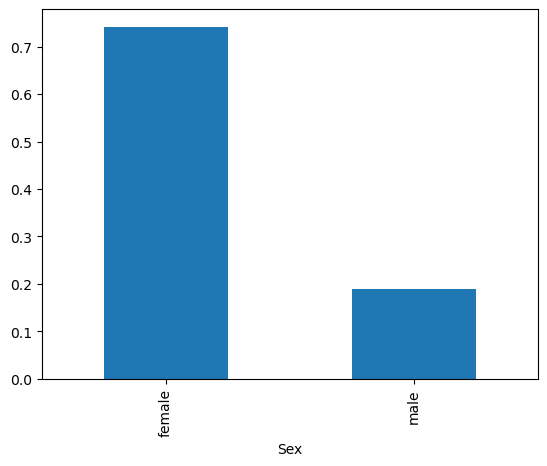

In [46]:
sex.plot(kind="bar")

In [48]:
# 特徴量にsexも追加
col = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex"]

x = df2[col]
t = df2["Survived"]

train_score, test_score, model = learn(x, t)

ValueError: could not convert string to float: 'female'

In [49]:
# Sexは文字列の列なのでモデル学習に使えない
df2


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,26.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [59]:
# モデル学習は数値データでなければならないため、Sexを数値に変換する
# maleを1、femaleを0に変換してmaleに代入
male = pd.get_dummies(df2["Sex"], drop_first=True, dtype=int)
male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [60]:
embarked = pd.get_dummies(df2["Embarked"], drop_first=False, dtype=int)

In [61]:
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [62]:
# 元々のxとmaleを結合
x_temp = pd.concat([x,male], axis=1)
x_temp

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,1
1,1,38.0,1,0,71.2833,female,0
2,3,26.0,0,0,7.9250,female,0
3,1,35.0,1,0,53.1000,female,0
4,3,35.0,0,0,8.0500,male,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,male,1
887,1,19.0,0,0,30.0000,female,0
888,3,26.0,1,2,23.4500,female,0
889,1,26.0,0,0,30.0000,male,1


In [63]:
# Sex列の削除
x_new = x_temp.drop("Sex", axis=1)

In [64]:
x_new

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,26.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [65]:
# モデルの学習
for j in range(1, 6):
    s1, s2, model = learn(x_new, t, depth = j)
    s = "深さ{}：訓練データの正解率{:.3f}、テストデータの正解率{:.3f}"
    print(s.format(j, s1, s2))

深さ1：訓練データの正解率0.787、テストデータの正解率0.788
深さ2：訓練データの正解率0.792、テストデータの正解率0.782
深さ3：訓練データの正解率0.847、テストデータの正解率0.810
深さ4：訓練データの正解率0.854、テストデータの正解率0.849
深さ5：訓練データの正解率0.865、テストデータの正解率0.860


In [66]:
# 深さ5のモデルを作成
s1, s2, model = learn(x_new, t, depth = 5)

# モデルの保存
import pickle
with open("survived.pkl", "wb") as f:
    pickle.dump(model, f)

In [68]:
# 特徴量重要度の確認
model.feature_importances_

array([0.12084767, 0.25107251, 0.06754808, 0.00275855, 0.05145686,
       0.50631633])

In [69]:
# データフレームに変換
pd.DataFrame(model.feature_importances_, index=x_new.columns)


,0
Pclass,0.120848
Age,0.251073
SibSp,0.067548
Parch,0.002759
Fare,0.051457
male,0.506316
